In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score
from PrepareDataset import PrepareDataset

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv', header=0)

In [3]:
dataset = PrepareDataset(dataset=data)
dataset = dataset.early_preparation()
dataset = dataset.set_rows_to_zeros()
dataset = dataset.split_power()
dataset = dataset.standard_scaled_dataset()

In [4]:
train_dataset = dataset.train()
val_dataset = dataset.val()
test_dataset = dataset.test()

In [5]:
tf.random.set_seed(1)
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(11, 1)))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))

In [6]:
model.compile(loss='mse', optimizer=Adam(0.001))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 11, 64)            4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,249
Trainable params: 37,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
model_checkpoint = ModelCheckpoint('SimpleRNNModel.h5', verbose=0, save_best_only=True)

In [9]:
model.fit(train_dataset[0], train_dataset[1], epochs=50, validation_data=(val_dataset[0], val_dataset[1]),
                                              callbacks=[early_stopping, model_checkpoint], batch_size=2, verbose=0)

In [10]:
model.load_weights('SimpleRNNModel.h5')

In [11]:
predictions = model.predict(test_dataset[0], verbose=0)[:,0]

In [12]:
print(f'R^2 score: {round(r2_score(test_dataset[1], predictions), 3)}')
print(f'R score: {round(np.sqrt(r2_score(test_dataset[1], predictions)), 3)}')

R^2 score: 0.741
R score: 0.861


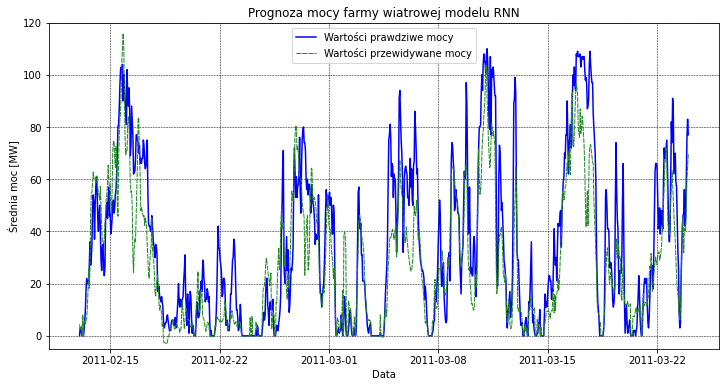

In [13]:
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], test_dataset[1], color='blue', label='Wartości prawdziwe mocy', linewidth=1.5)
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], predictions, color='forestgreen',
                                                                     linestyle=(0, (5, 1)), label='Wartości przewidywane mocy', linewidth=1)
fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([-5, 120])
plt.ticklabel_format(axis='y', style='plain')
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.title('Prognoza mocy farmy wiatrowej modelu RNN')
plt.xlabel('Data')
plt.ylabel('Średnia moc [MW]')
plt.legend(loc='best')
plt.show()

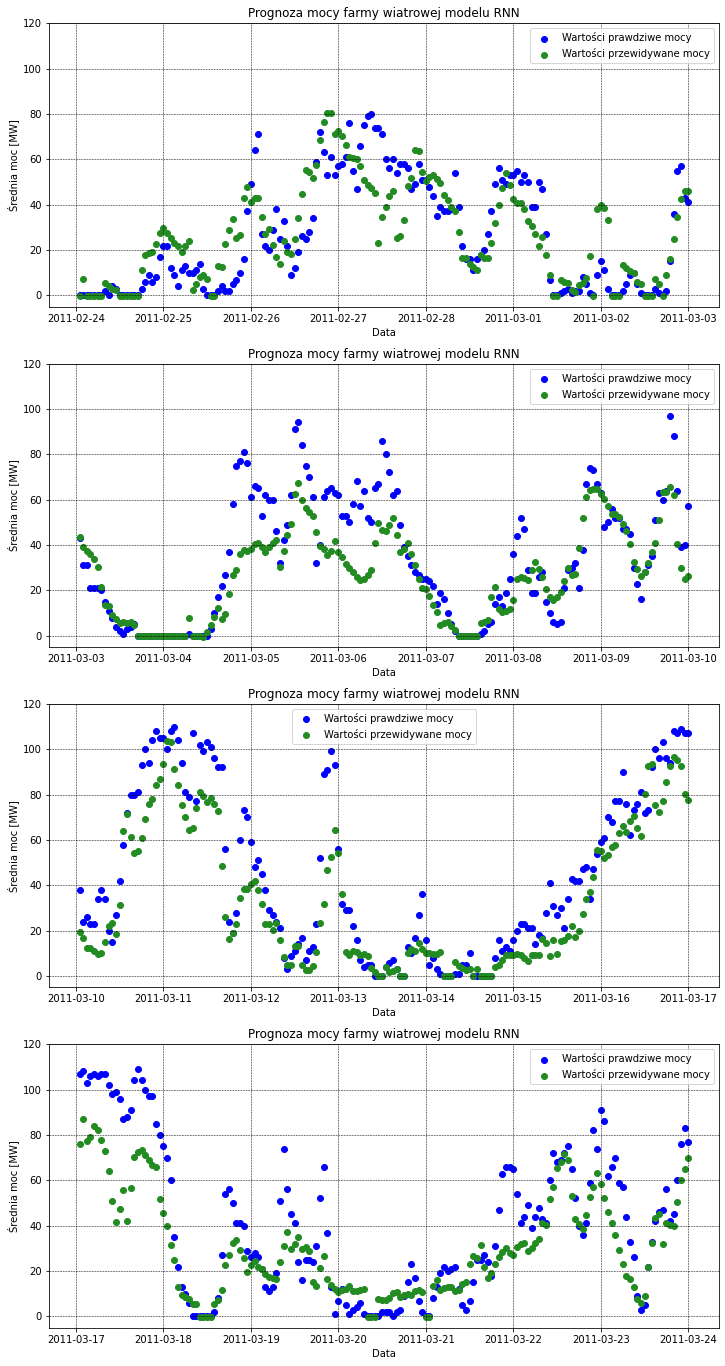

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(12,24))
ax3.scatter(dataset.date_time[-168:], test_dataset[1][-168:], color='blue', label='Wartości prawdziwe mocy')
ax3.scatter(dataset.date_time[-168:], predictions[-168:], color='forestgreen', label='Wartości przewidywane mocy')
ax3.set_ylim([-5, 120])
ax3.ticklabel_format(axis='y', style='plain')
ax3.grid(color='k', linewidth=0.5, linestyle='--')
ax3.set_title('Prognoza mocy farmy wiatrowej modelu RNN')
ax3.set_xlabel('Data')
ax3.set_ylabel('Średnia moc [MW]')
ax3.legend(loc='best')

ax2.scatter(dataset.date_time[-336:-168], test_dataset[1][-336:-168], color='blue', label='Wartości prawdziwe mocy')
ax2.scatter(dataset.date_time[-336:-168], predictions[-336:-168], color='forestgreen', label='Wartości przewidywane mocy')
ax2.set_ylim([-5, 120])
ax2.ticklabel_format(axis='y', style='plain')
ax2.grid(color='k', linewidth=0.5, linestyle='--')
ax2.set_title('Prognoza mocy farmy wiatrowej modelu RNN')
ax2.set_xlabel('Data')
ax2.set_ylabel('Średnia moc [MW]')
ax2.legend(loc='best')

ax1.scatter(dataset.date_time[-504:-336], test_dataset[1][-504:-336], color='blue', label='Wartości prawdziwe mocy')
ax1.scatter(dataset.date_time[-504:-336], predictions[-504:-336], color='forestgreen', label='Wartości przewidywane mocy')
ax1.set_ylim([-5, 120])
ax1.ticklabel_format(axis='y', style='plain')
ax1.grid(color='k', linewidth=0.5, linestyle='--')
ax1.set_title('Prognoza mocy farmy wiatrowej modelu RNN')
ax1.set_xlabel('Data')
ax1.set_ylabel('Średnia moc [MW]')
ax1.legend(loc='best')

ax0.scatter(dataset.date_time[-672:-504], test_dataset[1][-672:-504], color='blue', label='Wartości prawdziwe mocy')
ax0.scatter(dataset.date_time[-672:-504], predictions[-672:-504], color='forestgreen', label='Wartości przewidywane mocy')
ax0.set_ylim([-5, 120])
ax0.ticklabel_format(axis='y', style='plain')
ax0.grid(color='k', linewidth=0.5, linestyle='--')
ax0.set_title('Prognoza mocy farmy wiatrowej modelu RNN')
ax0.set_xlabel('Data')
ax0.set_ylabel('Średnia moc [MW]')
ax0.legend(loc='best')

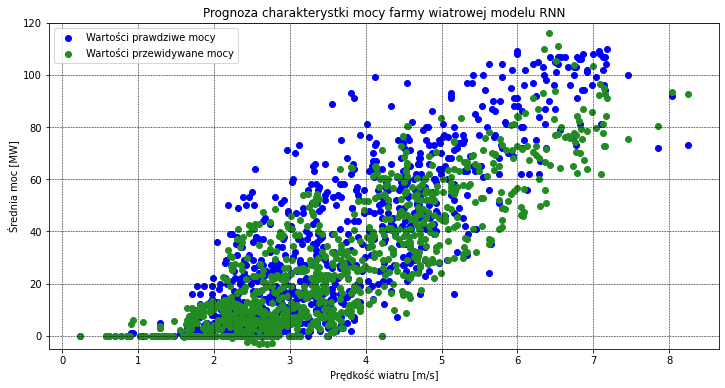

In [15]:
plt.scatter(dataset.wind_speed[int(dataset.lenght * 0.9):], test_dataset[1], color='blue', label='Wartości prawdziwe mocy')
plt.scatter(dataset.wind_speed[int(dataset.lenght * 0.9):], predictions, color='forestgreen', label='Wartości przewidywane mocy')
fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([-5, 120])
plt.ticklabel_format(axis='y', style='plain')
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.title('Prognoza charakterystki mocy farmy wiatrowej modelu RNN')
plt.xlabel('Prędkość wiatru [m/s]')
plt.ylabel('Średnia moc [MW]')
plt.legend(loc='best')
plt.show()